In [52]:
import numpy as np
import pandas as pd
from brian2 import *   
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [54]:
path = "../data/spike_generated_LIF.csv"

df = pd.read_csv(path)

In [55]:
df = df.iloc[:, 1:]

In [56]:
df.shape

(1800000, 51)

1. Scatter plot całości 
2. Scatter plot dwóch pojedynczych kanałów
3. Barplot ilość spików na kanał
4. Firing rate dla każdego neuronu
5. Dużo o ISI
6. Fano factor
7. Autokorelacja

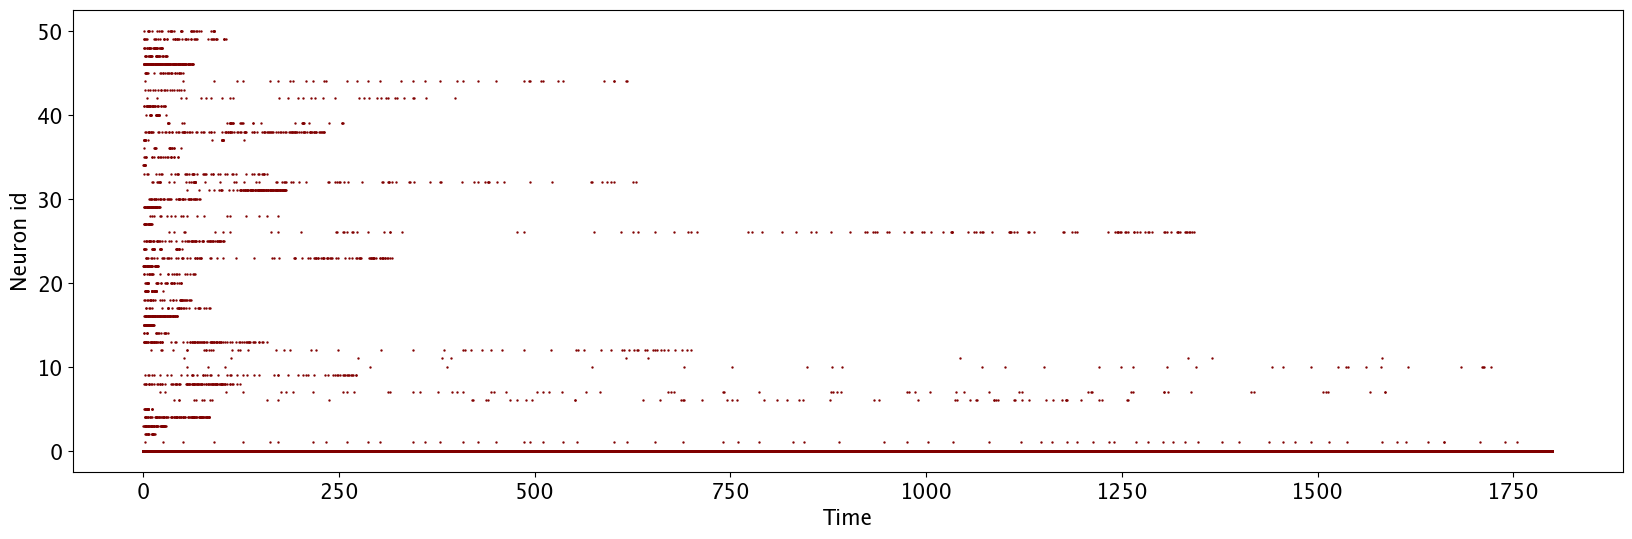

In [57]:
spike_times, neuron_idx = df.to_numpy().nonzero()
plt.figure(figsize=(20, 6))
plt.scatter(spike_times / 1000, neuron_idx, s=0.5, color='maroon') 
plt.xlabel('Time', fontsize=15)
plt.ylabel('Neuron id', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15) 
plt.show()

In [58]:
df.shape[1]

51

In [59]:
sum_spikes = []
for i in range(df.shape[1]):
    sum_spikes.append(sum(df.iloc[:, i]))

In [60]:
sum_spikes = sum_spikes[1:]

In [61]:
max(sum_spikes), min(sum_spikes)

(166, 9)

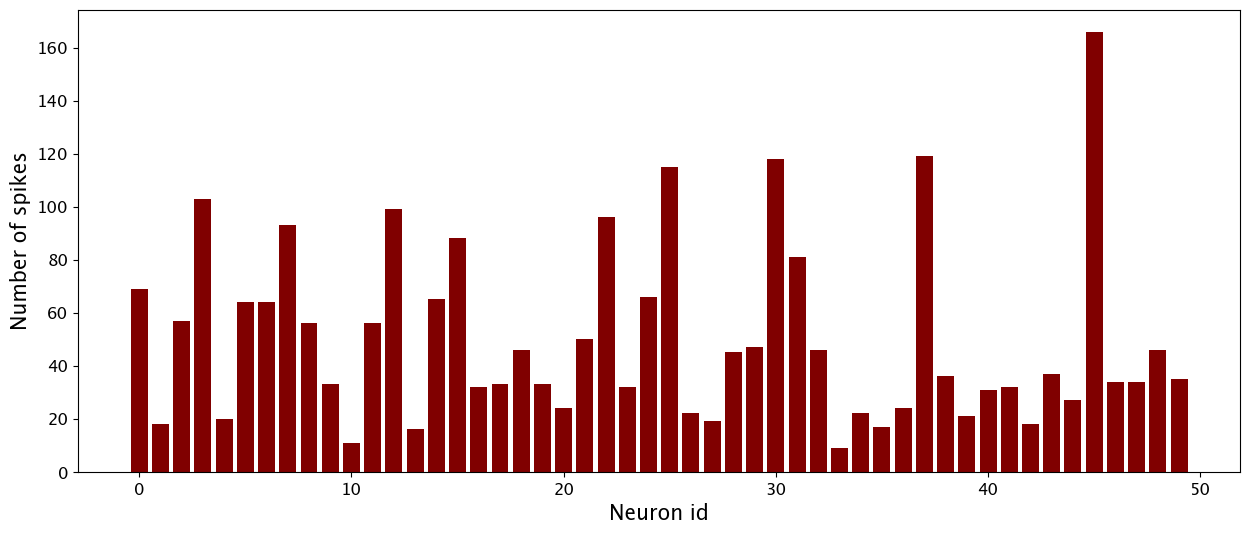

In [62]:
plt.figure(figsize=(15, 6))
plt.bar(range(df.shape[1] - 1), sum_spikes, color='maroon') 
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Number of spikes', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

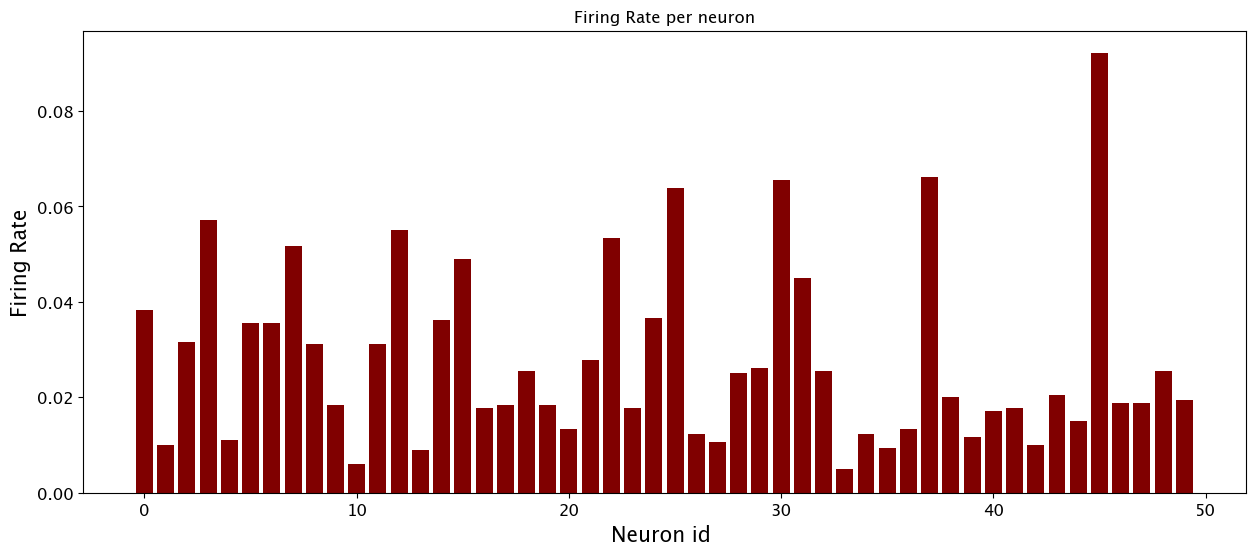

In [63]:
duration = 1800
firing_rates = [spike_count / duration for spike_count in sum_spikes]  # Firing rate 

plt.figure(figsize=(15, 6))
plt.bar(range(df.shape[1] - 1), firing_rates, color='maroon') 
plt.title('Firing Rate per neuron')
plt.xlabel('Neuron id ', fontsize=15)
plt.ylabel('Firing Rate', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

In [64]:
print(f" Mean firing rate: {mean(firing_rates)}")
print(f" Median firing rate: {median(firing_rates)}")
print(f" Standard deviation firing rate: {std(firing_rates)}")

 Mean firing rate: 0.028055555555555552
 Median firing rate: 0.020277777777777777
 Standard deviation firing rate: 0.018760758230485144


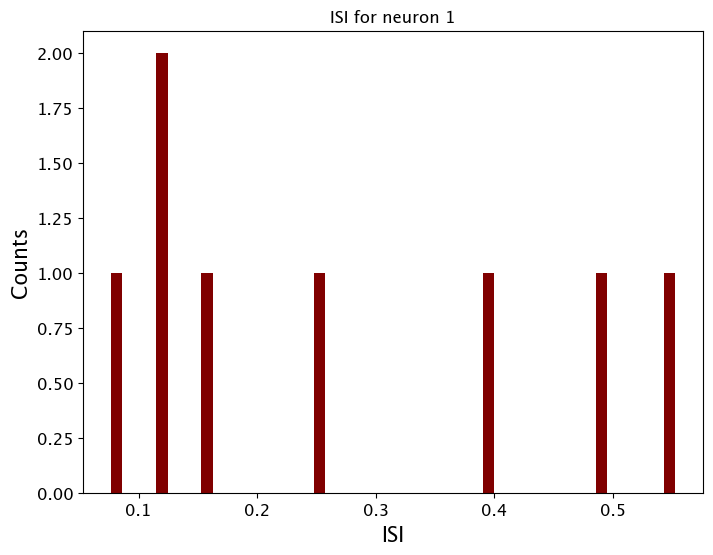

In [65]:
neuron_spikes = df.iloc[:, 34].to_numpy()
times = df.iloc[:, 0].to_numpy() 
spike_times = times[neuron_spikes == 1]
isi = np.diff(spike_times)

plt.figure(figsize=(8, 6))
plt.hist(isi, bins=50, color='maroon') 
plt.title('ISI for neuron 1')
plt.xlabel('ISI', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

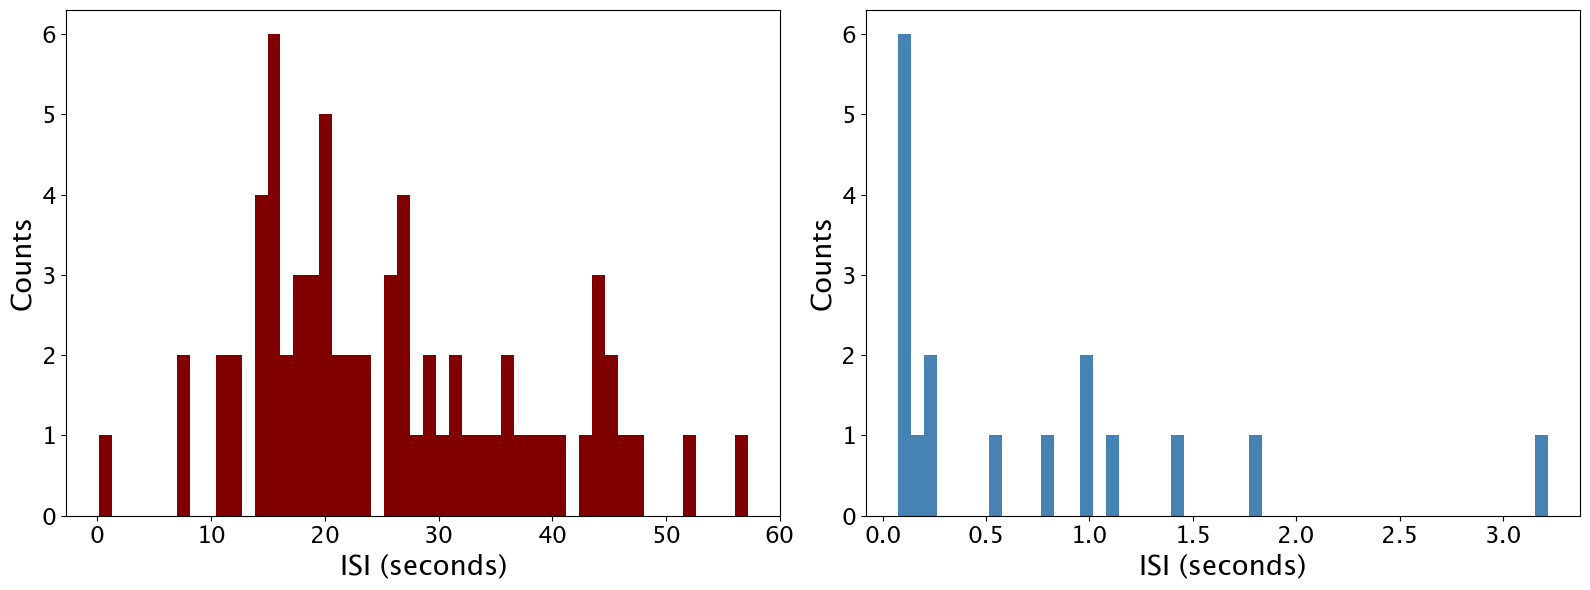

In [66]:
neuron1_spikes = df.iloc[:, 1].to_numpy()
times = df.iloc[:, 0].to_numpy()
spike_times1 = times[neuron1_spikes == 1]
isi1 = np.diff(spike_times1)

#2
neuron2_spikes = df.iloc[:, 2].to_numpy()
spike_times2 = times[neuron2_spikes == 1]
isi2 = np.diff(spike_times2)


plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(isi1, bins=50, color='maroon')
#plt.title('ISI for neuron 1', fontsize=15)
plt.xlabel('ISI (seconds)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(1, 2, 2)
plt.hist(isi2, bins=50, color='steelblue')
#plt.title('ISI for neuron 2', fontsize=20)
plt.xlabel('ISI (seconds)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17)

plt.tight_layout()
plt.show()


In [67]:
isi

array([0.253, 0.552, 0.16 , 0.117, 0.486, 0.399, 0.077, 0.123])

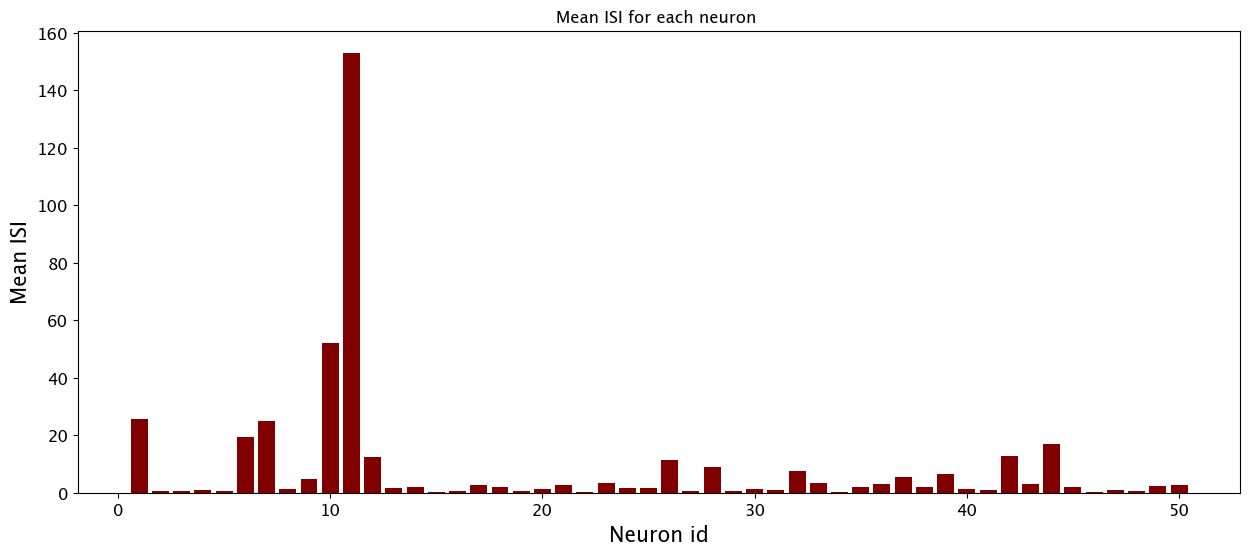

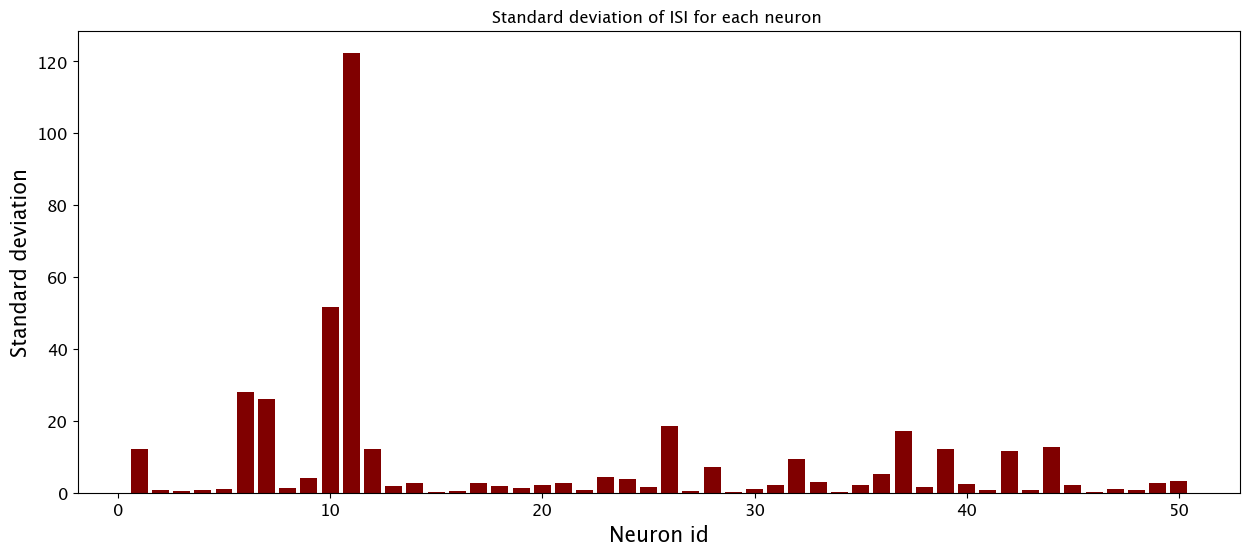

In [68]:
mean_isi_list = []
std_isi_list = []
for i in range(1, df.shape[1]): 
    neuron_spikes = df.iloc[:, i].to_numpy()

    times = df.iloc[:, 0].to_numpy()

    spike_times = times[neuron_spikes == 1]
    
    if len(spike_times) > 1:  
        isi = np.diff(spike_times)
        mean_isi = np.mean(isi) 
        mean_isi_list.append(mean_isi)  
        std_isi = np.std(isi) 
        std_isi_list.append(std_isi)
    else:
        mean_isi_list.append(np.nan) 
        std_isi_list.append(np.nan)

plt.figure(figsize=(15, 6))
plt.bar(range(1, df.shape[1]), mean_isi_list, color='maroon') 
plt.title('Mean ISI for each neuron ')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Mean ISI', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(range(1, df.shape[1]), std_isi_list, color='maroon') 
plt.title('Standard deviation of ISI for each neuron ')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Standard deviation', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()


In [69]:
print(f" Mean ISI: {mean(mean_isi_list)}")
print(f" Median ISI: {median(mean_isi_list)}")
print(f" Standard deviation of ISI: {std(mean_isi_list)}")

 Mean ISI: 8.300017061416316
 Median ISI: 1.9186922669491526
 Standard deviation of ISI: 22.55787879883283


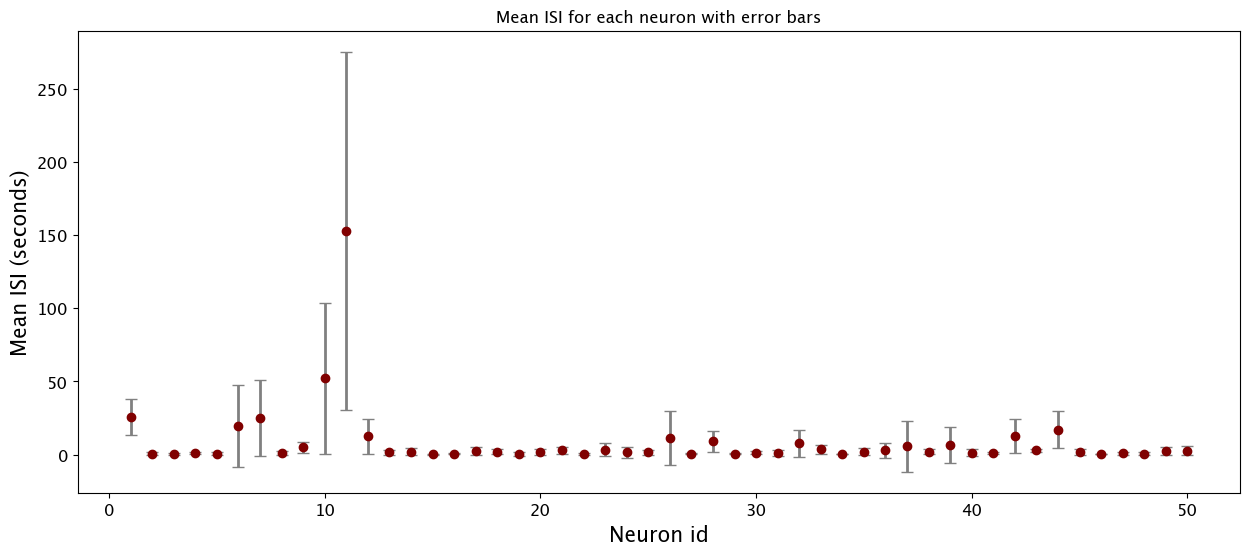

In [70]:
mean_isi_list = []
std_isi_list = []

for i in range(1, df.shape[1]): 
    neuron_spikes = df.iloc[:, i].to_numpy()
    times = df.iloc[:, 0].to_numpy()

    spike_times = times[neuron_spikes == 1]
    
    if len(spike_times) > 1:  
        isi = np.diff(spike_times)
        mean_isi = np.mean(isi) 
        mean_isi_list.append(mean_isi)  
        std_isi = np.std(isi) 
        std_isi_list.append(std_isi)
    else:
        mean_isi_list.append(np.nan) 
        std_isi_list.append(np.nan)

plt.figure(figsize=(15, 6))
plt.errorbar(range(1, df.shape[1]), mean_isi_list, yerr=std_isi_list, fmt='o', color='maroon', 
             ecolor='gray', elinewidth=2, capsize=4)  # Punkty z błędami
plt.title('Mean ISI for each neuron with error bars')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Mean ISI (seconds)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()


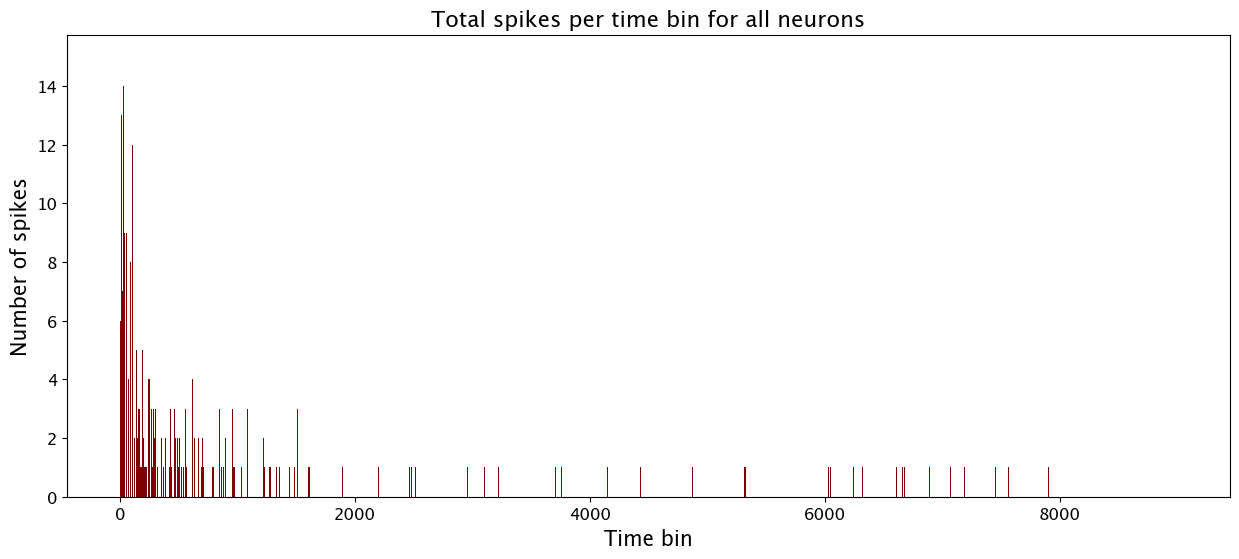

In [71]:
spikes = df.iloc[:, 1:].to_numpy() 

bin_size = 200 
num_bins = spikes.shape[0] // bin_size

binned_spikes_total = spikes[:num_bins*bin_size].reshape(num_bins, bin_size, -1).sum(axis=(1,2))

plt.figure(figsize=(15, 6))
plt.bar(range(num_bins), binned_spikes_total, color = 'maroon')
plt.xlabel('Time bin', fontsize=15)
plt.ylabel('Number of spikes', fontsize=15)
plt.title('Total spikes per time bin for all neurons', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Population Fano (bin_size=200 samples): 4.283


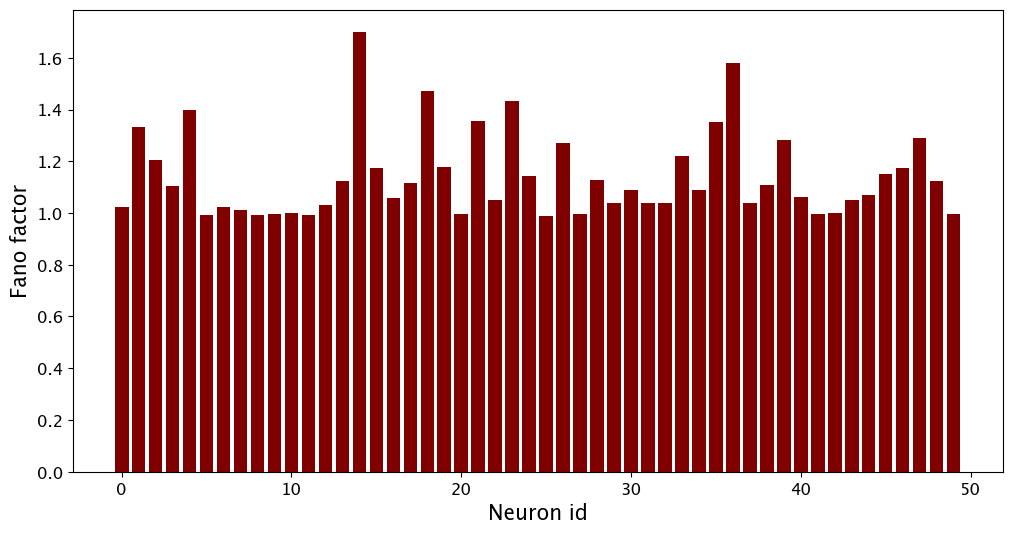

In [72]:
spikes = df.iloc[:, 1:].to_numpy()       
bin_size = 200                
num_bins = spikes.shape[0] // bin_size
B = spikes[:num_bins*bin_size].reshape(num_bins, bin_size, -1)
counts = B.sum(axis=1)                  

mu  = counts.mean(axis=0)
var = counts.var(axis=0, ddof=1)         
ff_neuron = np.where(mu > 0, var/mu, np.nan)

pop_counts = counts.sum(axis=1)     
pop_ff = pop_counts.var(ddof=1) / pop_counts.mean()
print(f"Population Fano (bin_size={bin_size} samples): {pop_ff:.3f}")

plt.figure(figsize=(12, 6))
plt.bar(range(len(ff_neuron)), ff_neuron, color='maroon')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Fano factor', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


In [73]:
min(ff_neuron), max(ff_neuron)

(0.9873319257695297, 1.700659047586484)

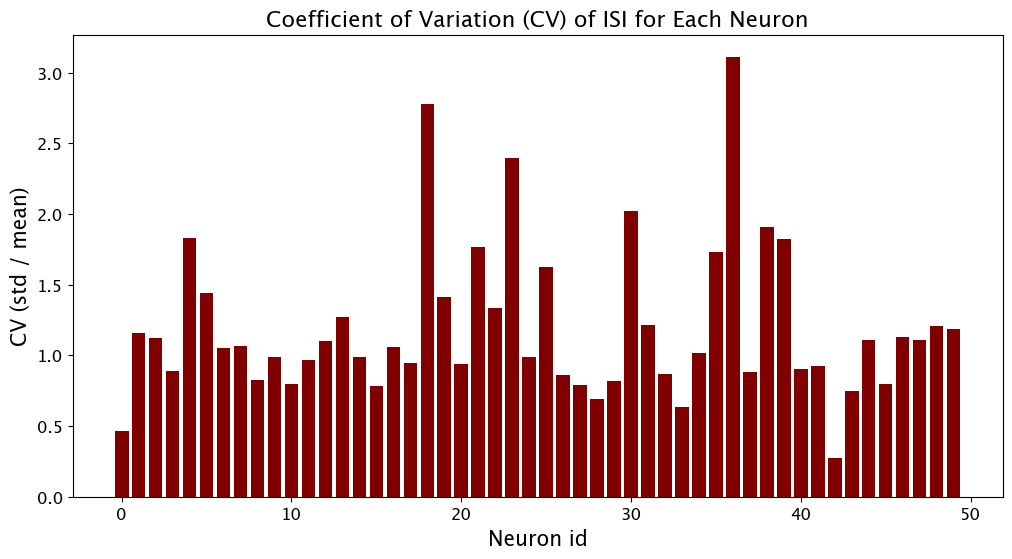

Mean CV across neurons: 1.20
Median CV across neurons: 1.06


In [74]:
num_neurons = df.shape[1] - 1  
isi_all_neurons = []
cv_all_neurons = []

for n in range(1, df.shape[1]): 
    spike_times = df.iloc[:, 0].to_numpy()[df.iloc[:, n] == 1]  
    if len(spike_times) > 1: 
        isi = np.diff(spike_times)
        isi_all_neurons.append(isi)
        cv_all_neurons.append(np.std(isi) / np.mean(isi)) 
    else:
        isi_all_neurons.append(np.array([]))
        cv_all_neurons.append(np.nan)

isi_all_flat = np.concatenate([isi for isi in isi_all_neurons if len(isi) > 0])

plt.figure(figsize=(12, 6))
plt.bar(range(num_neurons), cv_all_neurons, color='maroon')
plt.title('Coefficient of Variation (CV) of ISI for Each Neuron', fontsize=16)
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('CV (std / mean)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

print(f"Mean CV across neurons: {np.nanmean(cv_all_neurons):.2f}")
print(f"Median CV across neurons: {np.nanmedian(cv_all_neurons):.2f}")


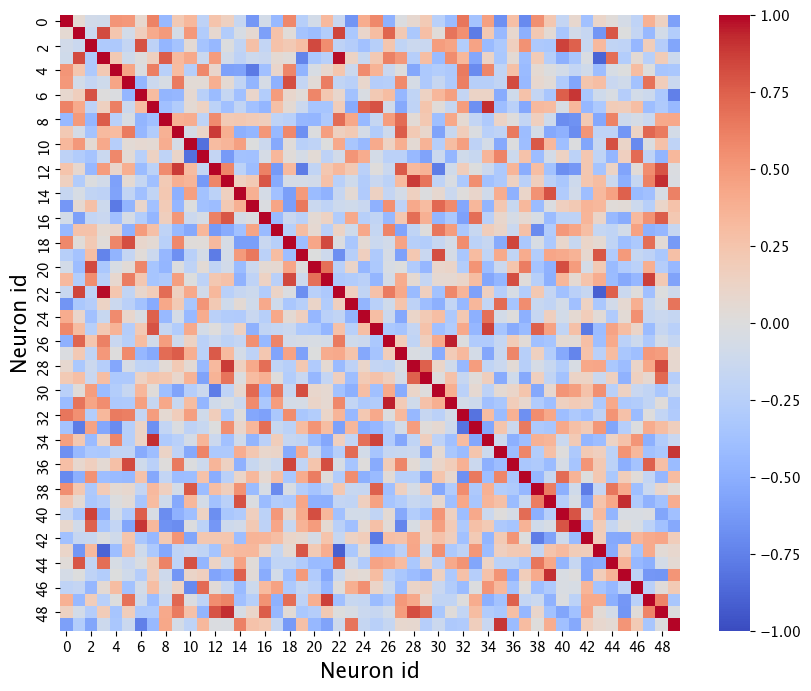

In [80]:
neurons = df.shape[1]-1
times = df.iloc[:, 0].to_numpy()

ISI_list = []
for i in range(neurons):
    spikes = df.iloc[:, i+1].to_numpy()
    spike_times = times[spikes == 1]
    isi = np.diff(spike_times)
    ISI_list.append(isi)

#dopasowujemy długość wszystkich ISI do najkrótszego neuronu
min_len = min(len(isi) for isi in ISI_list)
ISI_matrix = np.array([isi[:min_len] for isi in ISI_list])

corr_matrix = np.corrcoef(ISI_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Neuron id', fontsize=15)
plt.show()


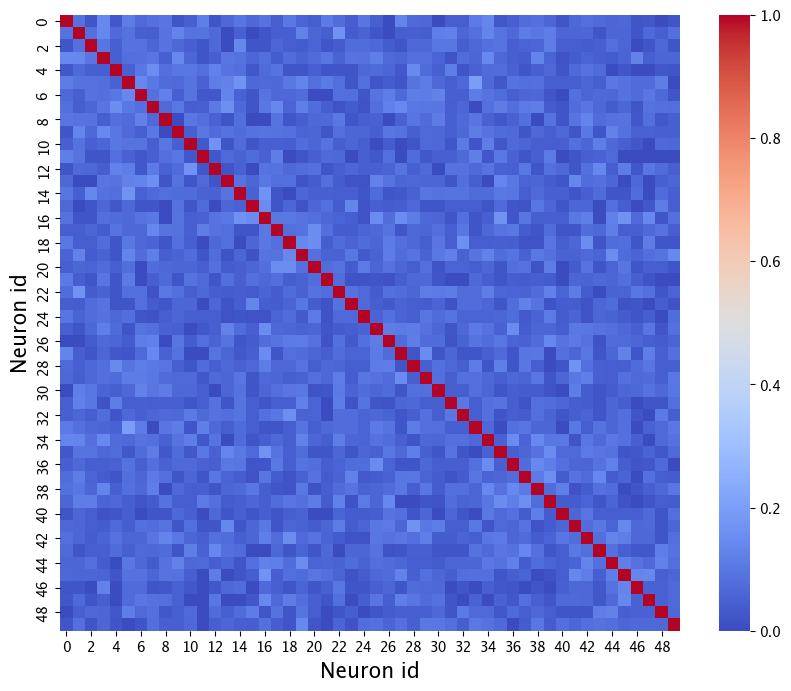

In [79]:
spike_matrix = df.iloc[:, 1:].to_numpy()
neurons = spike_matrix.shape[1]

bin_size = 200
n_bins = spike_matrix.shape[0] // bin_size
binned = spike_matrix[:n_bins*bin_size].reshape(n_bins, neurons, bin_size).sum(axis=2)
binned[binned > 0] = 1 
binned = binned.T 

sync_index = np.zeros((neurons, neurons))

for i in range(neurons):
    for j in range(i, neurons):
        coincident_spikes = np.sum((binned[i] == 1) & (binned[j] == 1))
        spikes_i = np.sum(binned[i])
        spikes_j = np.sum(binned[j])
        denom = (spikes_i + spikes_j) / 2   
        if denom > 0:
            sync = coincident_spikes / denom
        else:
            sync = 0
        sync_index[i, j] = sync
        sync_index[j, i] = sync

plt.figure(figsize=(10, 8))
sns.heatmap(sync_index, cmap='coolwarm', vmin=0, vmax=1)
plt.xlabel("Neuron id", fontsize=15)
plt.ylabel("Neuron id", fontsize=15)
plt.show()
